<a href="https://colab.research.google.com/github/SanjayS2348553/AiML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project**

# **Crime Rate Detection and Analysis**

Contributors- Anushka Mazumdar, Sanjay S, Swetha S

# **Importing Necessary Libraries**

In [ ]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Evaluation Metrics
import io, os, sys, setuptools
import prophet
from yellowbrick.classifier import ClassificationReport
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import csv
df1 = pd.read_csv('/content/Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
df2 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False,engine="python")
df3 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False,engine="python")
df4 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

Skipping line 533719: ',' expected after '"'


In [ ]:
data1 = pd.concat([df1,df2,df3,df4],ignore_index=False, axis=0)

In [ ]:
data= pd.concat([df1,df2,df3],ignore_index=False, axis=0)

In [ ]:
index_names = data[data['Latitude']=='(41.789832136, -87.672973835)'].index
data.drop(index_names, inplace = True)

In [ ]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.000,46.000,06,NaN,NaN,2004.000,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.000,61.000,26,1173974.000,1876757.000,2003.000,04/15/2016 08:55:02 AM,41.817,-87.637,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.000,22.000,20,NaN,NaN,2004.000,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.000,20.000,06,NaN,NaN,2004.000,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.000,49.000,06,1174948.000,1831051.000,2003.000,04/15/2016 08:55:02 AM,41.692,-87.635,"(41.691784636, -87.635115968)"


In [ ]:
data.shape

(1038068, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103427 entries, 0 to 29035
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            103427 non-null  int64  
 1   ID                    103427 non-null  int64  
 2   Case Number           103427 non-null  object 
 3   Date                  103427 non-null  object 
 4   Block                 103426 non-null  object 
 5   IUCR                  103426 non-null  object 
 6   Primary Type          103426 non-null  object 
 7   Description           103426 non-null  object 
 8   Location Description  103410 non-null  object 
 9   Arrest                103426 non-null  object 
 10  Domestic              103426 non-null  object 
 11  Beat                  103426 non-null  float64
 12  District              103426 non-null  float64
 13  Ward                  66402 non-null   float64
 14  Community Area        66316 non-null   float64
 15  F

In [ ]:
data['Latitude'] = data['Latitude'].astype('float64')

# DATA PREPROCESSING

# **HANDLING MISSING VALUES**

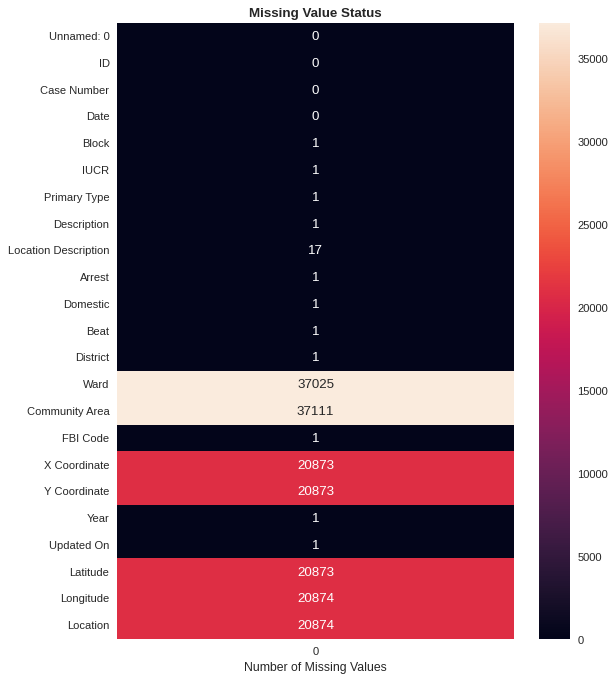

In [ ]:
#Plot missing values
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

Since the missing values cannot be imputed due to the nature of the dataset, we drop the null values, duplicate values and unwanted columns.

In [ ]:
data = data.dropna()

In [ ]:
data = data.drop_duplicates()

In [ ]:
data = data.drop(columns=['Unnamed: 0','ID','Case Number'], axis=1)

In [ ]:
data.shape

(664912, 23)

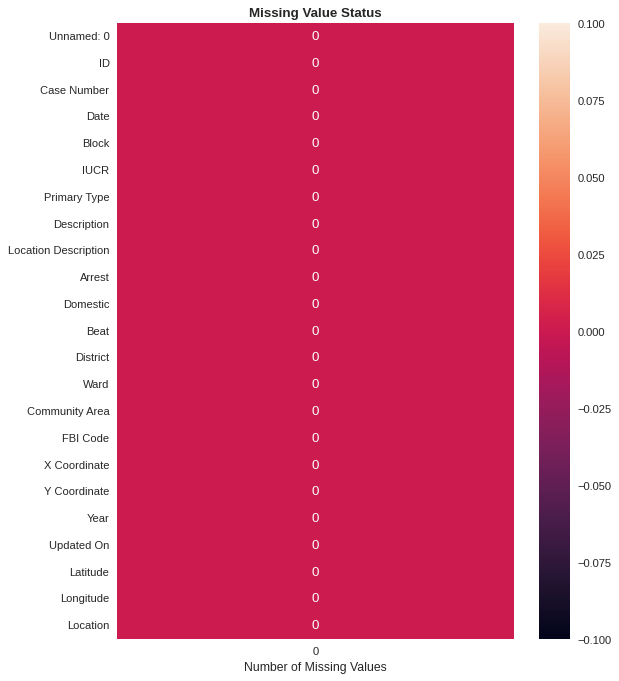

In [ ]:
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

Now, there are no missing values and data can be used for analysis

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,49121.000,49121.000,49121.000,49121.000,49121.000,49121.000,49121.000,49121.000,49121.000,49121.000,49121.000
mean,300875.388,5034297.147,1192.310,11.206,22.268,38.206,1164594.379,1885100.279,2006.527,41.840,-87.672
std,457847.565,934921.160,700.946,6.892,13.762,21.576,16257.284,31457.334,1.250,0.087,0.059
min,0.000,634.000,111.000,1.000,1.000,1.000,1100256.000,1813913.000,2001.000,41.645,-87.906
25%,12433.000,4690140.000,623.000,6.000,10.000,23.000,1153159.000,1858724.000,2006.000,41.768,-87.713
50%,24847.000,4709270.000,1033.000,10.000,21.000,34.000,1165969.000,1888345.000,2006.000,41.849,-87.666
75%,891394.000,5999899.000,1724.000,16.000,33.000,59.000,1176352.000,1909021.000,2008.000,41.906,-87.629
max,3580758.000,9231682.000,2535.000,31.000,50.000,77.000,1205112.000,1951493.000,2011.000,42.023,-87.525


In [ ]:
data.describe(include='object')

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Location
count,9991,9991,9991,9991,9991,9991,9991,9991,9991
unique,6983,205,26,191,86,4,4,25,9085
top,100XX W OHARE ST,0486,BATTERY,SIMPLE,STREET,False,False,06,"(41.976290414, -87.905227221)"
freq,35,937,1962,1171,2617,4975,6069,1901,35


In [ ]:
Classes = data['Primary Type'].unique()
Classes

array(['BURGLARY', 'NARCOTICS', 'THEFT', 'CRIMINAL TRESPASS',
       'CRIMINAL DAMAGE', 'BATTERY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'ASSAULT', 'HOMICIDE',
       'SEX OFFENSE', 'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT', 'PROSTITUTION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON', 'GAMBLING',
       'KIDNAPPING', 'STALKING', 'INTIMIDATION', 'LIQUOR LAW VIOLATION',
       'OTHER NARCOTIC VIOLATION'], dtype=object)

In [ ]:
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
data.index = pd.DatetimeIndex(data.Date)

In [ ]:
data['date2'] = pd.to_datetime(data['Date'])
data['Year'] = data['date2'].dt.year
data['Month'] = data['date2'].dt.month
data['Day'] = data['date2'].dt.day
data['Hour'] = data['date2'].dt.hour
data['Minute'] = data['date2'].dt.minute
data['Second'] = data['date2'].dt.second
data = data.drop(['date2'], axis=1)
data = data.drop(['Updated On'], axis=1)
data.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,...,1876757.0,2003,41.817229,-87.637328,"(41.817229156, -87.637328162)",3,1,0,0,0
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,...,1831051.0,2003,41.691785,-87.635116,"(41.691784636, -87.635115968)",5,1,1,0,0
6,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,531,5.0,...,1829375.0,2001,41.687020,-87.608445,"(41.687020002, -87.60844523)",1,1,11,0,0
7,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,2222,22.0,...,1844832.0,2003,41.729712,-87.653159,"(41.729712374, -87.653158513)",3,15,0,0,0
9,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1134,11.0,...,1895755.0,2003,41.869772,-87.708180,"(41.869772159, -87.708180162)",1,1,0,0,0


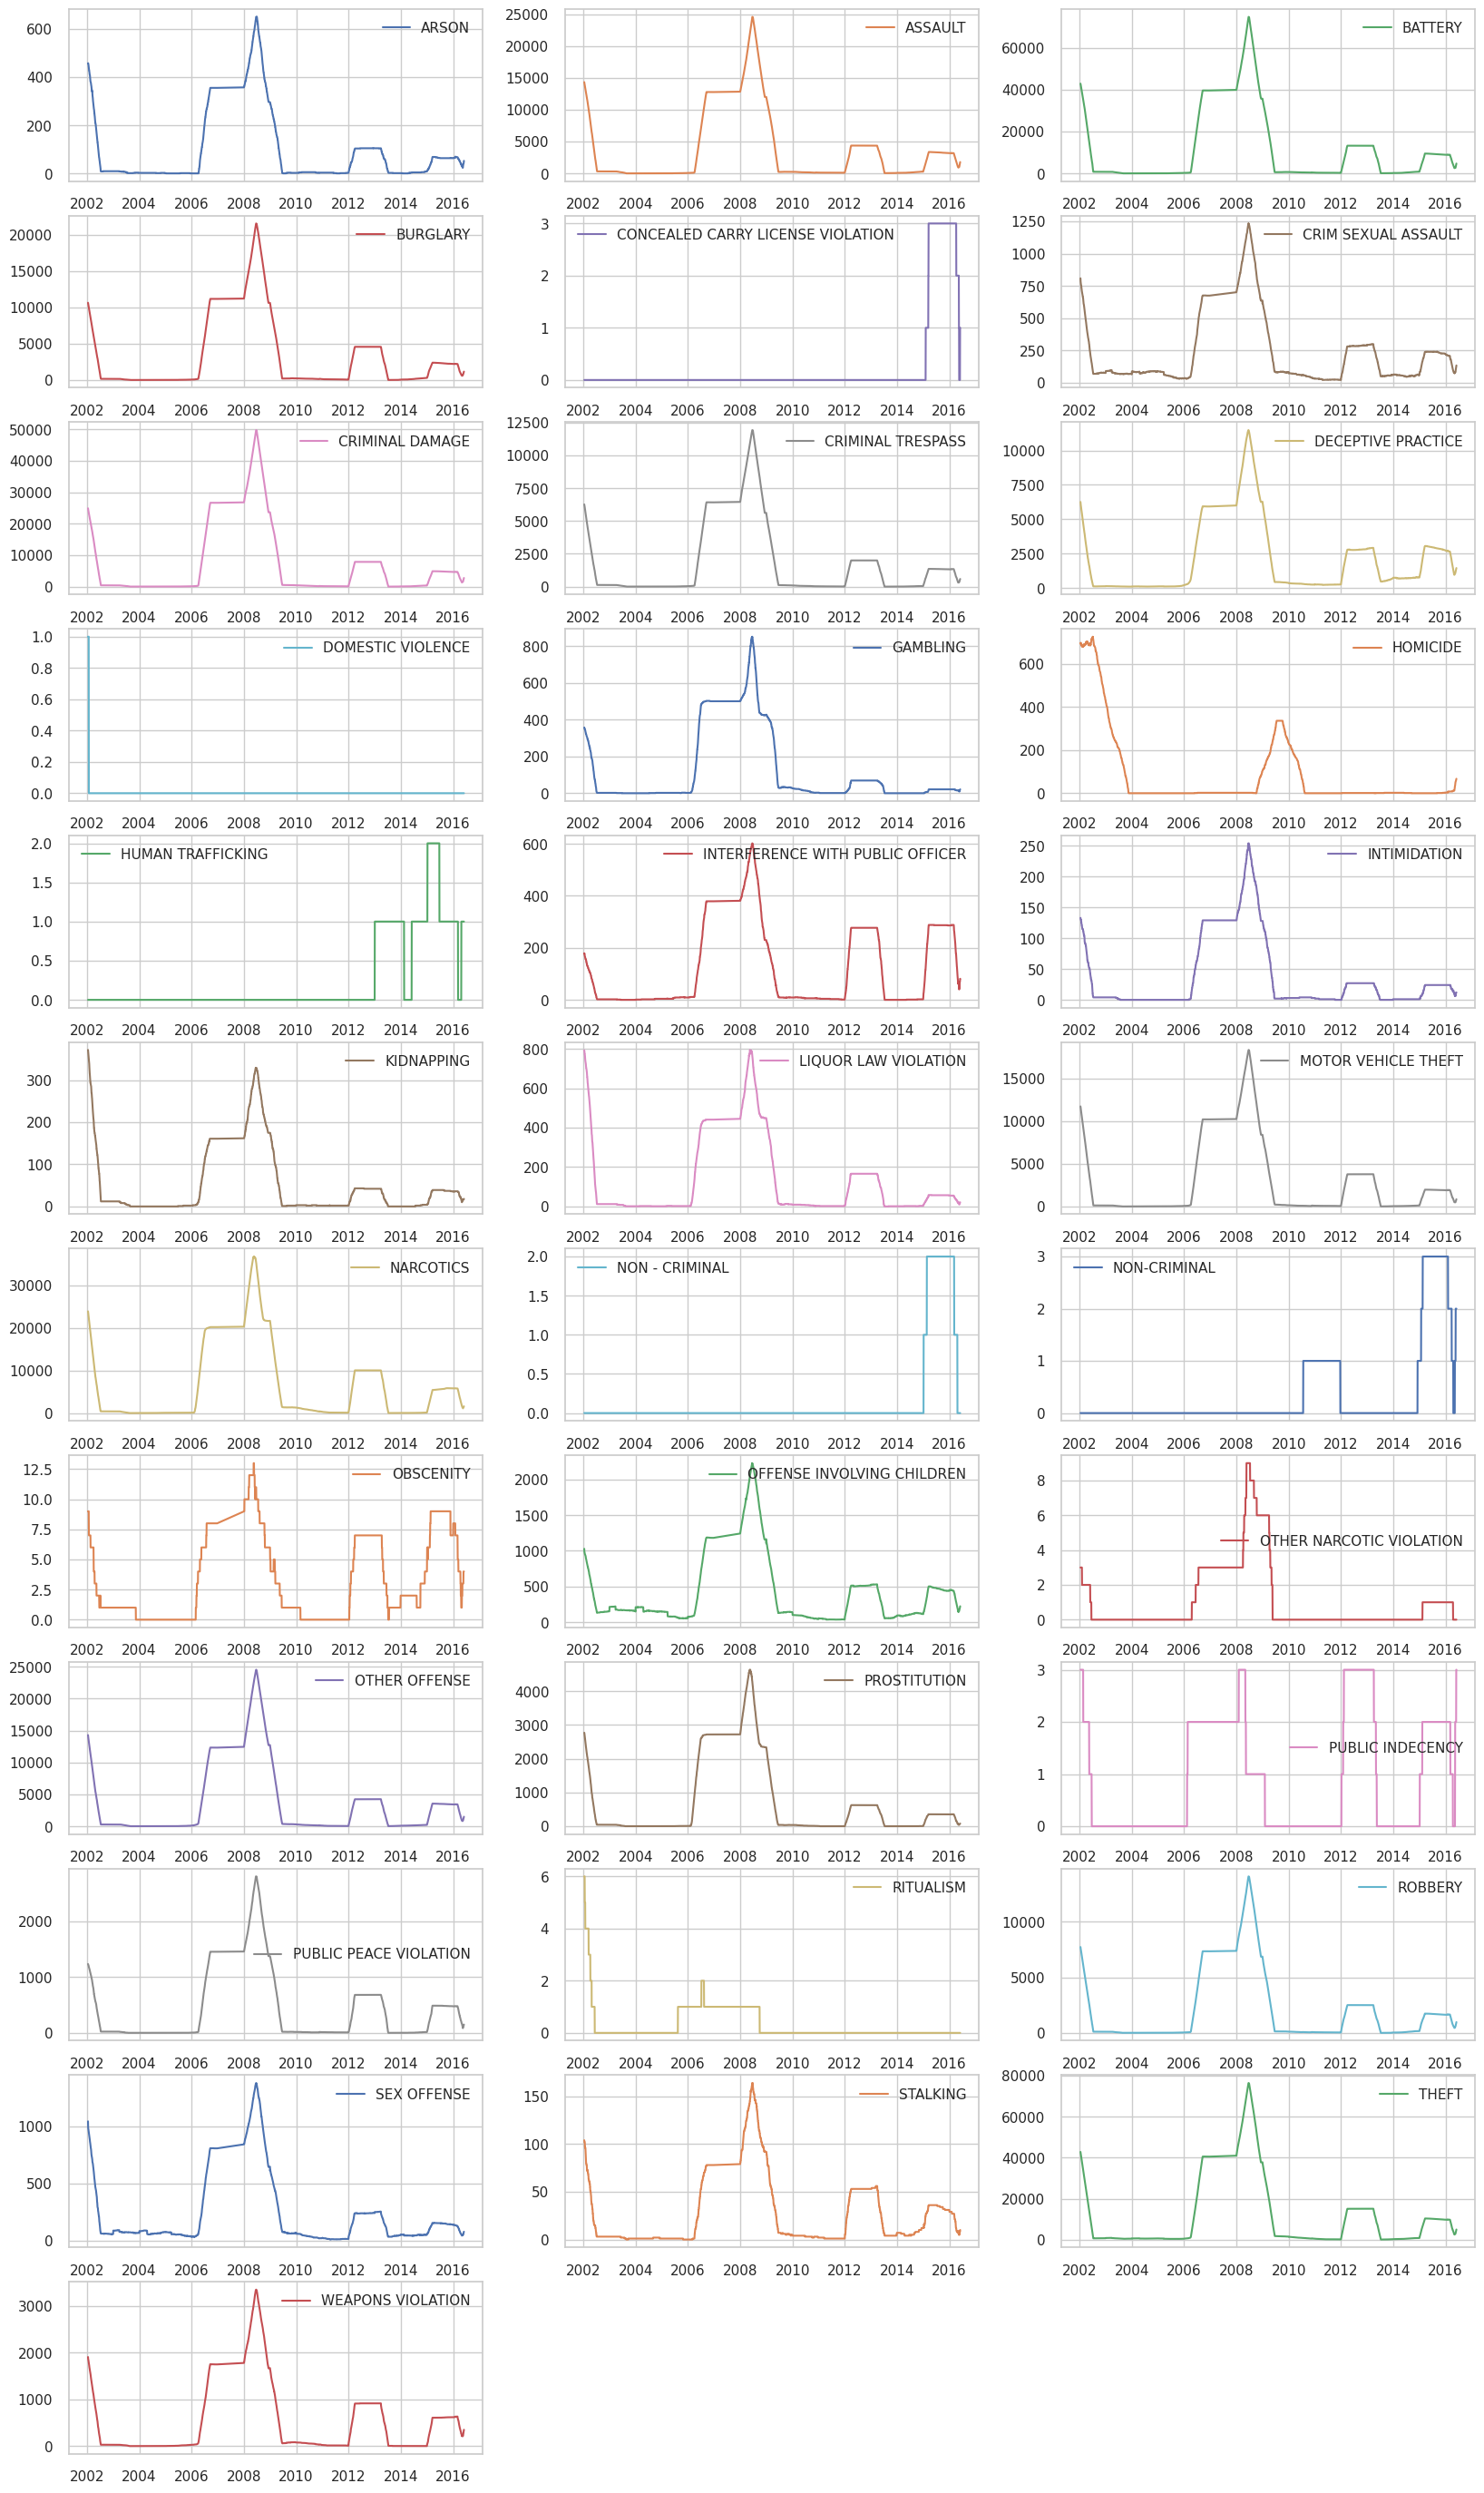

In [ ]:
crimes_count_date = data1.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data1.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(20, 35), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
#eliminate none criminal crimes
data.drop(data.index [data[ 'Primary Type' ] == 'PUBLIC INDECENCY' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON-CRIMINAL (SUBJECT SPECIFIED)' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON-CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON - CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'OBSCENITY' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'CONCEALED CARRY LICENSE VIOLATION' ] , inplace = True)

# **Data Visualization for Analysis**

Amount of Crimes by Primary Type

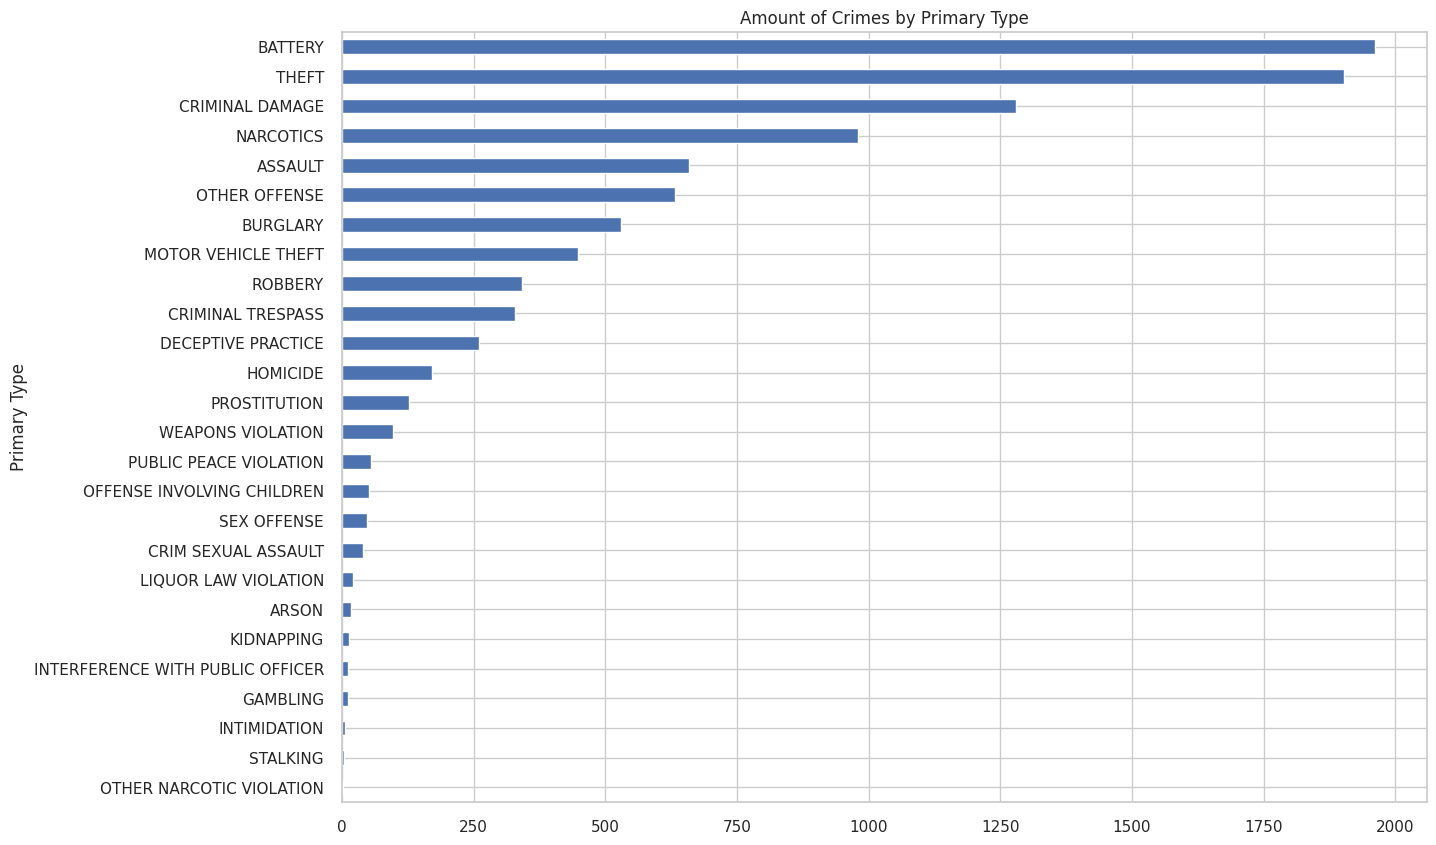

In [ ]:
pl.figure(figsize=(14,10))
pl.title('Amount of Crimes by Primary Type')
pl.ylabel('Crime Type')
pl.xlabel('Amount of Crimes')
data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
pl.show()

Amount of Crimes by Domestic

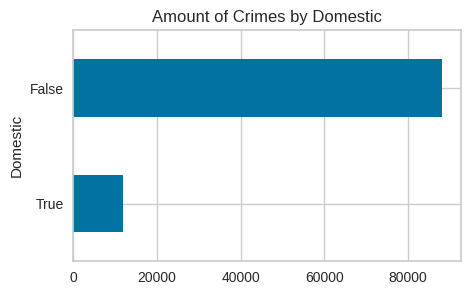

In [ ]:
pl.figure(figsize=(5,3))
pl.title('Amount of Crimes by Domestic')
pl.ylabel('Domestic')
pl.xlabel('Amount of Crimes')
data.groupby([data['Domestic']]).size().sort_values(ascending=True).plot(kind='barh')
pl.show()

Top 15 Places where the crimes have happened in Chicago

<Axes: xlabel='count', ylabel='Location Description'>

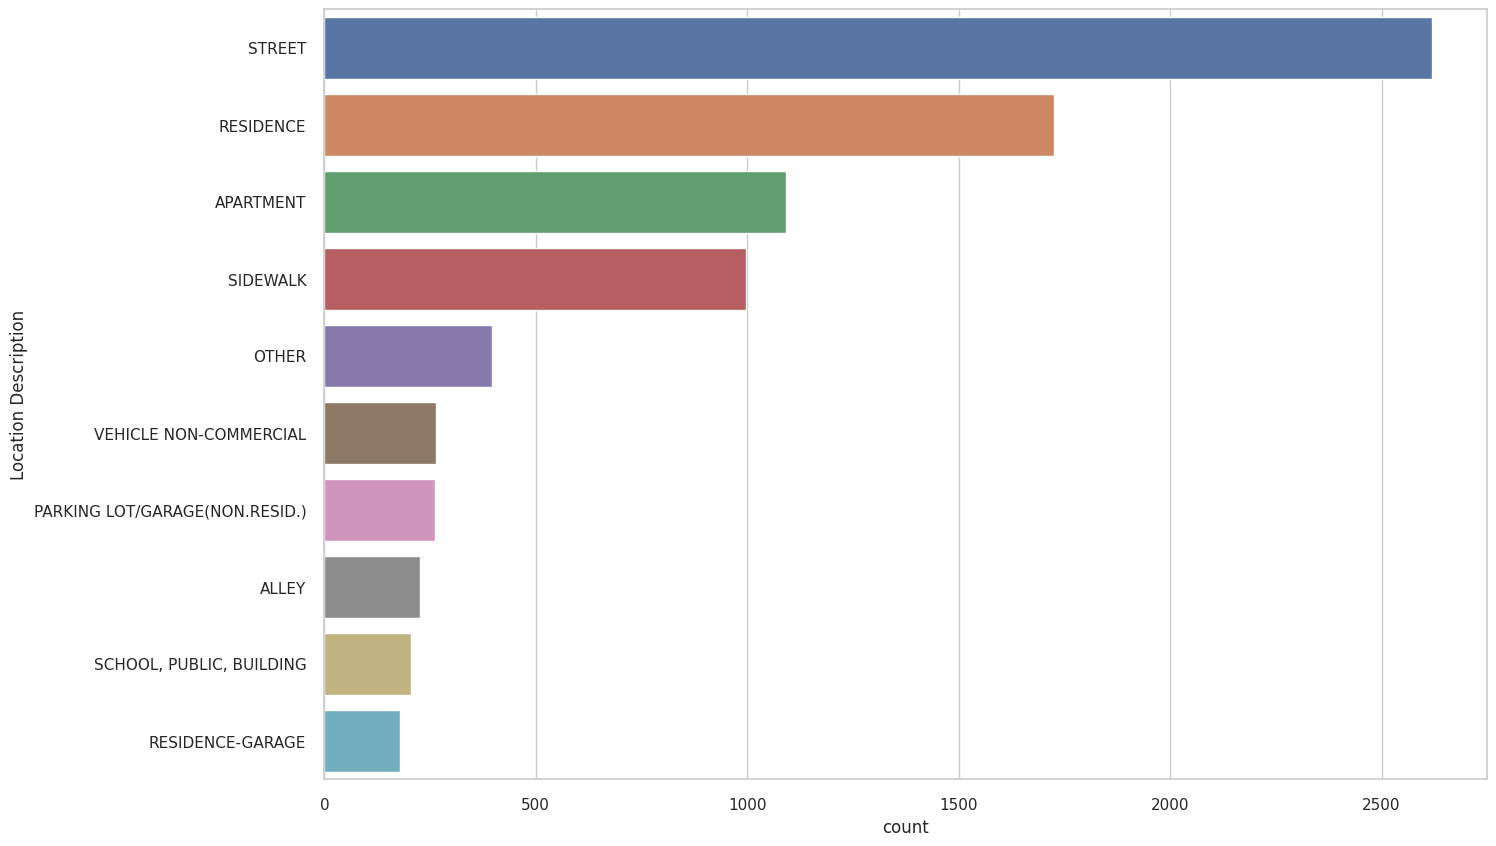

In [ ]:
pl.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:10].index)

Amount of Crimes by District

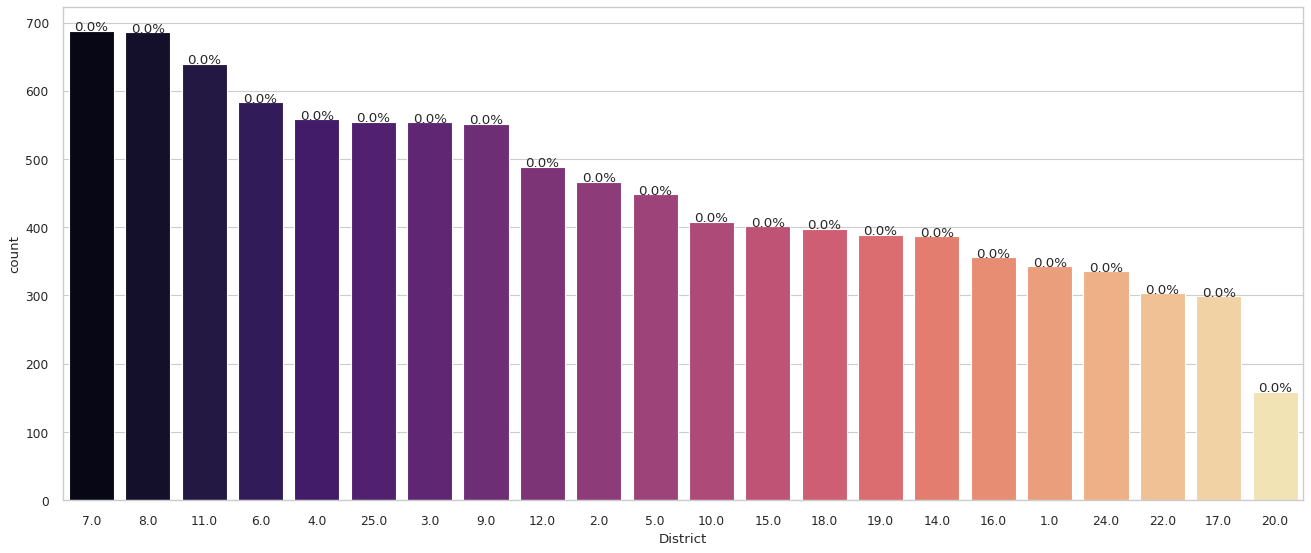

In [ ]:
pl.figure(figsize=(20, 8), dpi=80)
sns.set_theme(style="whitegrid")
sns.countplot(x="District", palette='magma', data=data , dodge=True , order = data['District'].value_counts().index )
order1 = data['District'].value_counts().to_list()
for i in range(22):
    count = order1[i]
    strt='{:.01f}%'.format(count*100/5478378)
    pl.text(i,count,strt,ha='center', zorder=10)
pl.show()

Amount of Crimes by Type

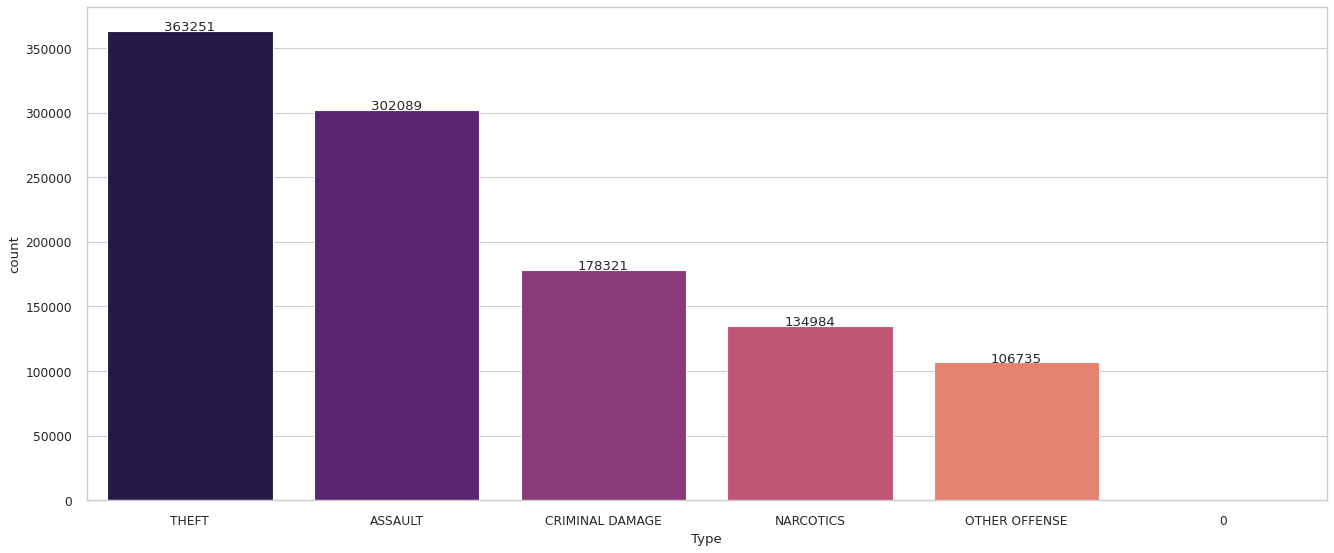

In [ ]:
pl.figure(figsize=(20, 8), dpi=80)
sns.set_theme(style="whitegrid")
sns.countplot(x="Type", palette='magma', data=data , dodge=True , order = data['Type'].value_counts().index )
order1 = data['Type'].value_counts().to_list()
for i in range(5):
    count = order1[i]
    strt='{:.0f}'.format(count)
    pl.text(i,count,strt,ha='center', zorder=10)
pl.show()

Plot to show crime rates over a period of time

In [ ]:
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
data.index = pd.DatetimeIndex(data.Date)

In [ ]:
#Make new dataframe for " Number of cases" per time
df_Time = pd.DataFrame(data.resample("M").size(), columns=["Number of cases"])
df_Time["Month"] = df_Time.index.month.astype(str)
df_Time["Year"] = df_Time.index.year.astype(str)
df_Time['Year Month'] = df_Time['Month']+'-'+df_Time['Year']
df_Time.head()

,Number of cases,Month,Year,Year Month
Date,,,,
2001-01-31,167,1,2001,1-2001
2001-02-28,86,2,2001,2-2001
2001-03-31,99,3,2001,3-2001
2001-04-30,120,4,2001,4-2001
2001-05-31,90,5,2001,5-2001


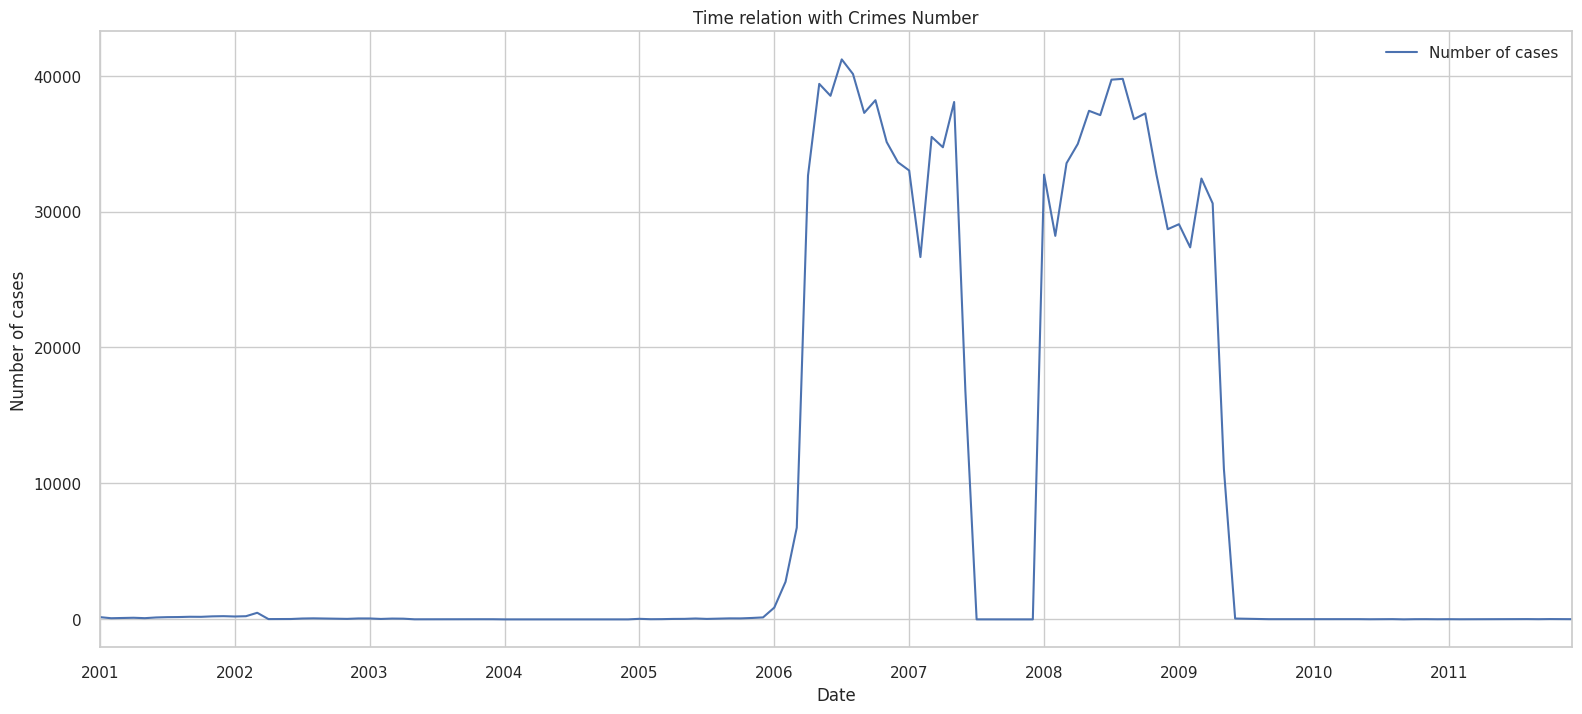

In [ ]:
#Time series plot
df_Time.plot(figsize=(19,8) , ylabel='Number of cases')
pl.title('Time relation with Crimes Number')
pl.show()

In [ ]:
# Convert Categorical Attributes to Numerical
data['Block'] = pd.factorize(data["Block"])[0]
data['Description'] = pd.factorize(data["Description"])[0]
data['Location Description'] = pd.factorize(data["Location Description"])[0]
data['FBI Code'] = pd.factorize(data["FBI Code"])[0]

Correlation heatmap using Pearson Correlation

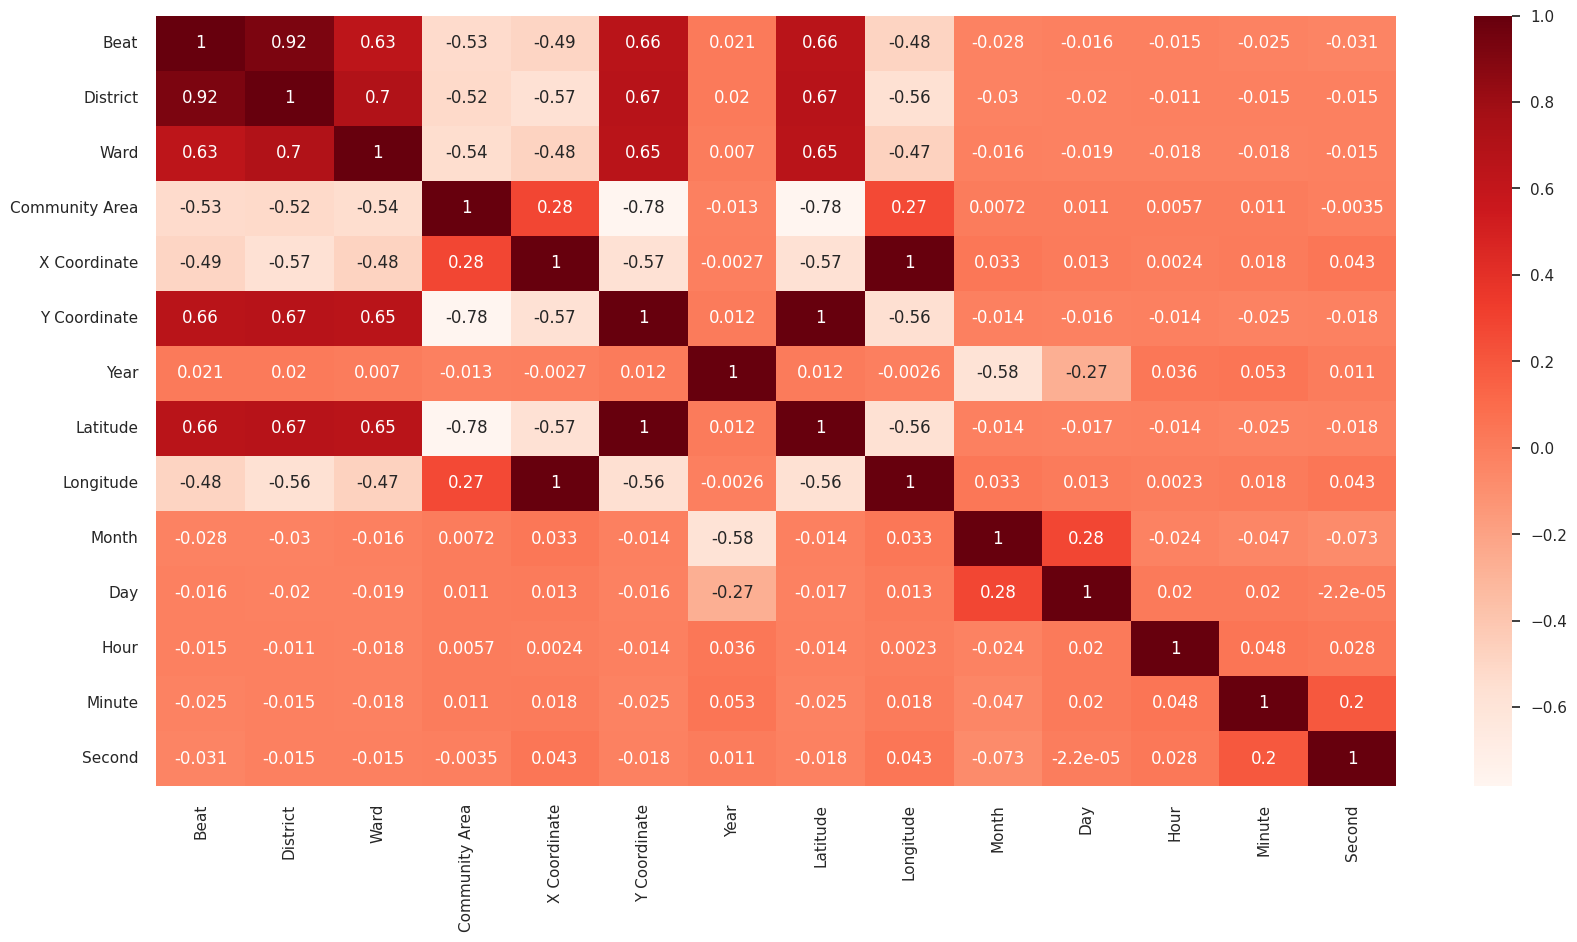

In [ ]:
#Using Pearson Correlation
pl.figure(figsize=(20,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=pl.cm.Reds)
pl.show()

Visualizing the locations of crime happenings on the Map of Chicago

In [ ]:
import folium

In [ ]:
chicago_map = folium.Map(location=[41.864073,-87.706819],zoom_start=11,tiles="CartoDB dark_matter")

In [ ]:
locations = data.groupby('Community Area').first()

In [ ]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [ ]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [ ]:
chicago_map

# **Building the Model**

In [ ]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
data = data.sample(n=100000)

In [ ]:
# Remove irrelevant/not meaningfull attributes
data = data.drop(columns= ['Unnamed: 0','ID','Case Number'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 26925 to 77979
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  bool   
 7   Domestic              100000 non-null  bool   
 8   Beat                  100000 non-null  int64  
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  float64
 1

In [ ]:
# Convert Categorical Attributes to Numerical
data['IUCR'] = pd.factorize(data["IUCR"])[0]
data['Description'] = pd.factorize(data["Description"])[0]
data['FBI Code'] = pd.factorize(data["FBI Code"])[0]

In [ ]:
# in the 'Amount of Crimes by Primary Type' plot, we could see quite the class imbalance
# Therefore, we group several less occured Crime Type into 'Others' to reduce the Target Class amount
# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = data.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
4,CRIM SEXUAL ASSAULT,4374
8,GAMBLING,3817
13,LIQUOR LAW VIOLATION,3218
0,ARSON,2168
10,INTERFERENCE WITH PUBLIC OFFICER,1906
9,HOMICIDE,1637
12,KIDNAPPING,1127
11,INTIMIDATION,799
26,STALKING,532
16,OBSCENITY,48


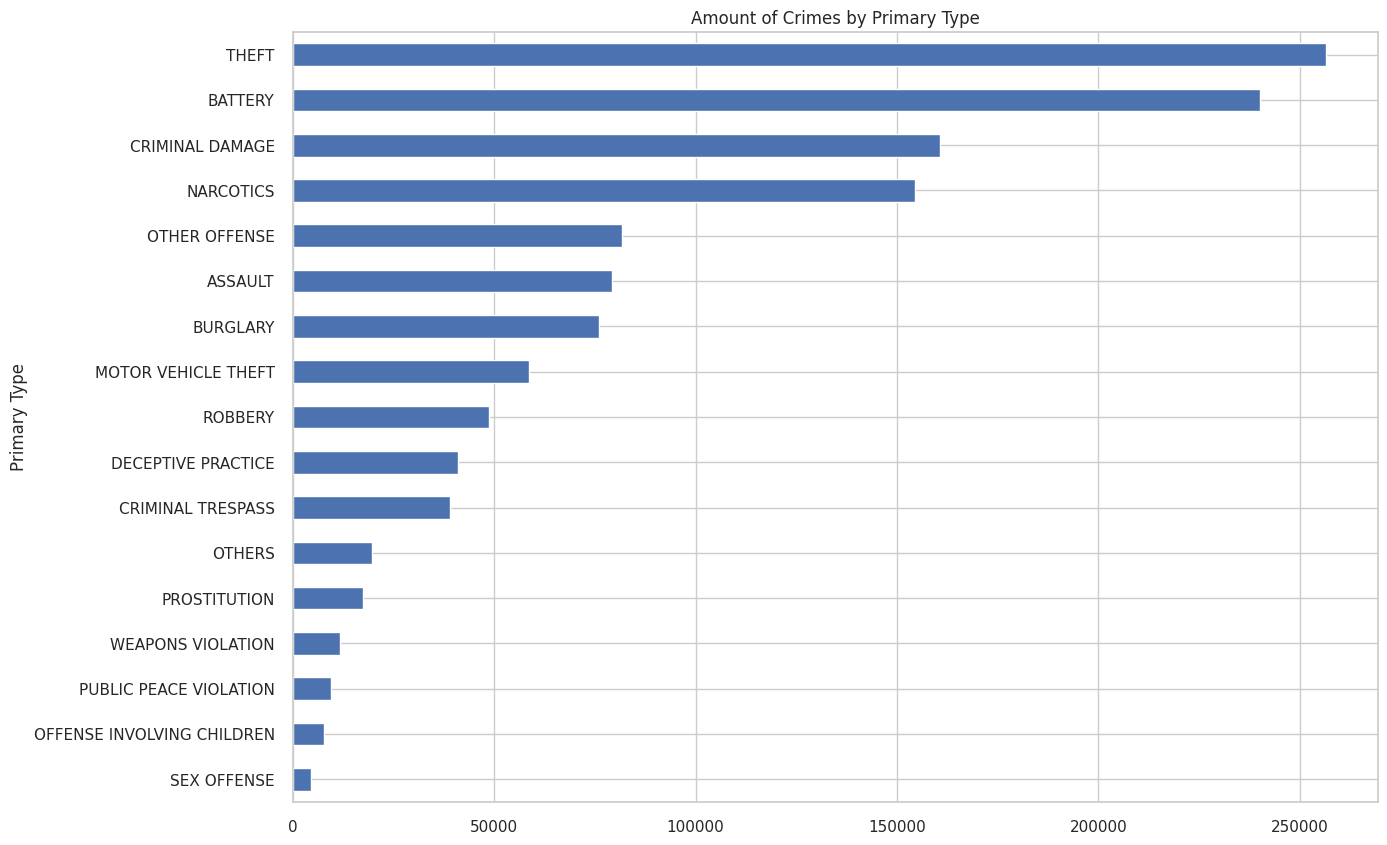

In [ ]:
# After that, we replaced it with label 'OTHERS'
data.loc[data['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
pl.figure(figsize=(14,10))
pl.title('Amount of Crimes by Primary Type')
pl.ylabel('Crime Type')
pl.xlabel('Amount of Crimes')

data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

pl.show()

In [ ]:
# Now we are left with 14 Class as our predictive class
Classes = data['Primary Type'].unique()
Classes

array(['OTHER OFFENSE', 'THEFT', 'OTHERS', 'OFFENSE INVOLVING CHILDREN',
       'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'DECEPTIVE PRACTICE',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'ROBBERY', 'BATTERY',
       'BURGLARY', 'ASSAULT', 'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'WEAPONS VIOLATION', 'PROSTITUTION'], dtype=object)

In [ ]:
#Encode target labels into categorical variables:
data['Primary Type'] = pd.factorize(data["Primary Type"])[0]
data['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

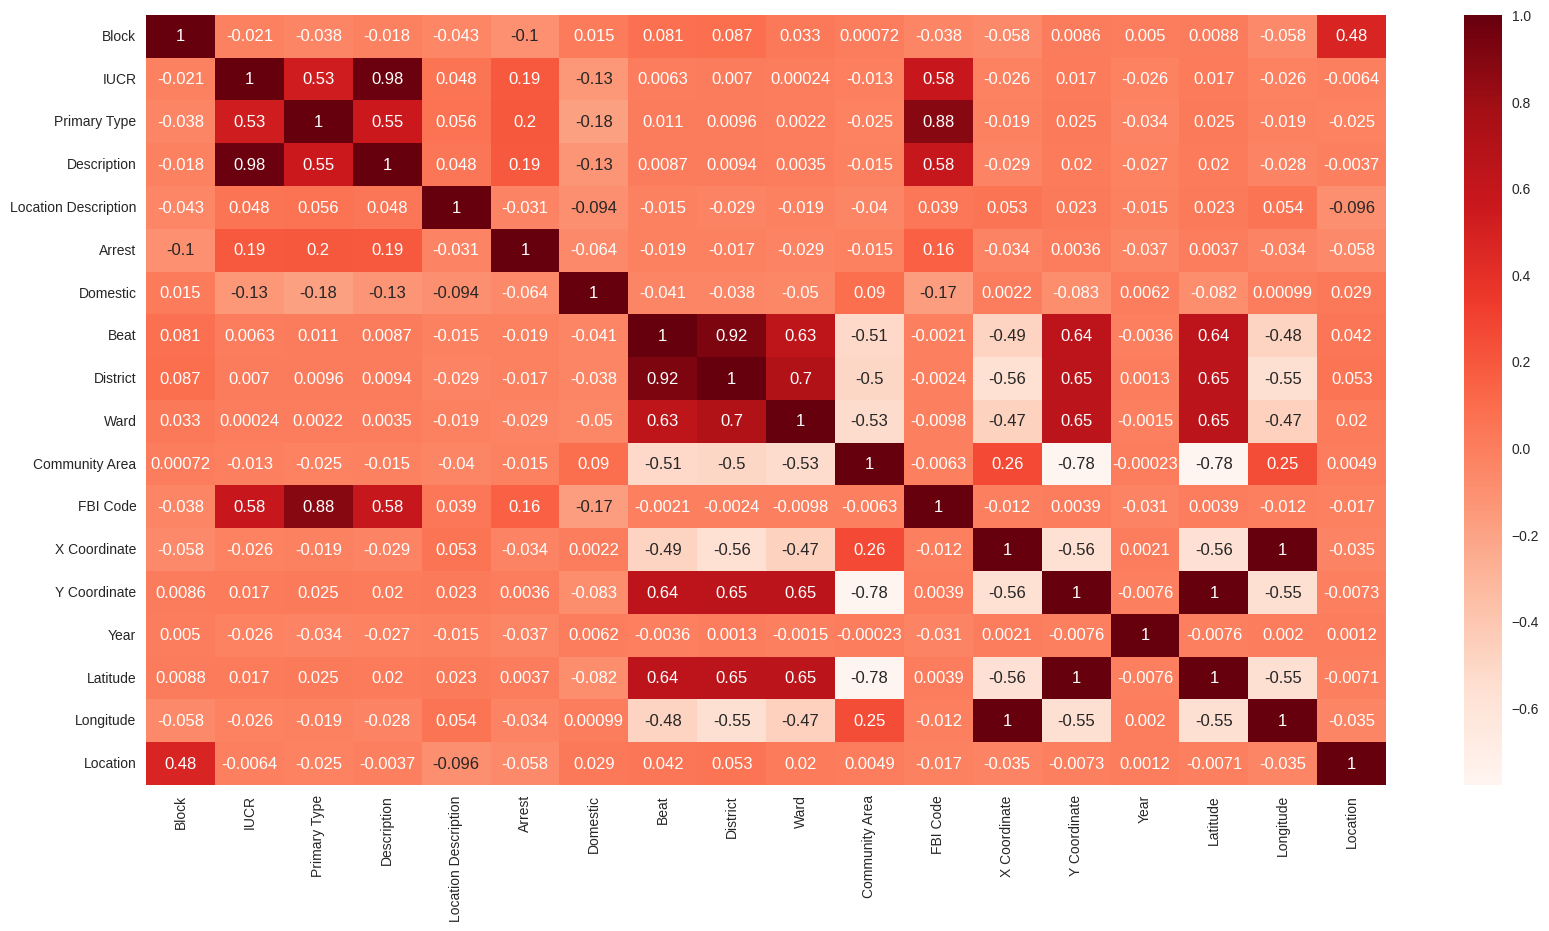

In [ ]:
# Feature Selection using Filter Method
#Using Pearson Correlation
pl.figure(figsize=(20,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=pl.cm.Reds)
pl.show()

In [ ]:
# Feature Selection using Filter Method
# Split Dataframe to target class and features
X_fs = data.drop(columns= ['Primary Type'], axis=1) #Features
Y_fs = data['Primary Type'] #Target

In [ ]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.531630
Primary Type    1.000000
Description     0.554223
FBI Code        0.878765
Name: Primary Type, dtype: float64

In [ ]:
# The attributes are selected manually based on Feature Selection heatmap.
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [ ]:
Target = 'Primary Type'

In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(data,
                        test_size = 0.2,
                        train_size = 0.8,
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (1045520, 24)
Test Set Size       :  (261381, 24)


In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312137 entries, 2008-05-04 23:36:00 to 2006-06-03 19:40:00
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   IUCR         312137 non-null  int64
 1   Description  312137 non-null  int64
 2   FBI Code     312137 non-null  int64
dtypes: int64(3)
memory usage: 9.5 MB


**Method 1: Random Forest Classifier**

---



In [ ]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True,
                                  max_depth = 50,
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [ ]:
from sklearn import metrics

In [ ]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
confusion_m

========== Random Forest Results ==========
Accuracy    :  0.9997436692031938
Recall      :  0.9997436692031938
Precision   :  0.9997435816353097
F1 Score    :  0.9997436692031938
Confusion Matrix: 


array([[16290,     0,     4,     2,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0, 51197,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   11,     0,  3900,     0,     0,     0,     0,     0,     0,
            0,     3,     0,     7,     7,     0,     0,     0],
       [    4,     0,     1,  1580,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     4,     0],
       [    0,     0,     0,     7, 11769,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     4,     0,     0,   877,     0,     0,     2,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,  8362,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0

================= Classification Report =================

                            precision    recall  f1-score   support

             OTHER OFFENSE       1.00      1.00      1.00     16296
                     THEFT       1.00      1.00      1.00     51197
                    OTHERS       1.00      0.99      0.99      3928
OFFENSE INVOLVING CHILDREN       0.99      0.99      0.99      1589
       MOTOR VEHICLE THEFT       1.00      1.00      1.00     11776
               SEX OFFENSE       1.00      0.99      1.00       883
        DECEPTIVE PRACTICE       1.00      1.00      1.00      8362
           CRIMINAL DAMAGE       1.00      1.00      1.00     31938
         CRIMINAL TRESPASS       1.00      1.00      1.00      7902
                   ROBBERY       1.00      1.00      1.00      9681
                   BATTERY       1.00      1.00      1.00     48091
                  BURGLARY       1.00      1.00      1.00     15281
                   ASSAULT       1.00      1.00      1.0

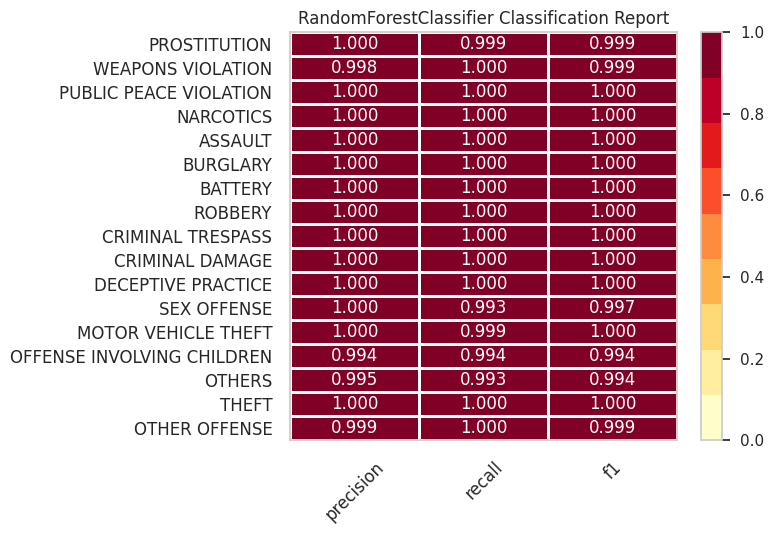

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

**Method 2: Neural Networks (Multilayer Perceptron)**

In [ ]:
# Neural Network
# Create Model with configuration
nn_model = MLPClassifier(solver='adam',
                         alpha=1e-5,
                         hidden_layer_sizes=(40,),
                         random_state=1,
                         max_iter=1000)

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.9722
Recall      :  0.9722
Precision   :  0.9718429393332312
F1 Score    :  0.9722
Confusion Matrix: 
[[ 192    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 2349   11    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   94 1121    0    0    1    0    0    0   10    0    0    0    0
     0]
 [   0    0   25 2473    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1206    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0   18    0 3502   82    0    0    0    0    0    0    0
     0]
 [   0    0    0    9    0   18 3883    0    0    0    0    0    0    0
     0]
 [   0    0    0    1    0    0    0  878    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  622    0    0    0    0    0
     0]
 [   0   27   33    0    0    6    0    0    0  341    0   24   36    0
     1]
 [   0    0    0    0    0    0    0

================= Classification Report =================

                        precision    recall  f1-score   support

     WEAPONS VIOLATION       1.00      1.00      1.00       192
             NARCOTICS       0.95      1.00      0.97      2360
         OTHER OFFENSE       0.90      0.91      0.91      1226
       CRIMINAL DAMAGE       0.99      0.99      0.99      2498
              BURGLARY       1.00      1.00      1.00      1206
               BATTERY       0.99      0.97      0.98      3602
                 THEFT       0.98      0.99      0.99      3910
   MOTOR VEHICLE THEFT       1.00      1.00      1.00       879
     CRIMINAL TRESPASS       1.00      1.00      1.00       622
                OTHERS       0.78      0.73      0.75       468
               ROBBERY       1.00      1.00      1.00       769
               ASSAULT       0.98      0.99      0.98      1227
    DECEPTIVE PRACTICE       0.91      0.89      0.90       605
          PROSTITUTION       1.00      0.98 

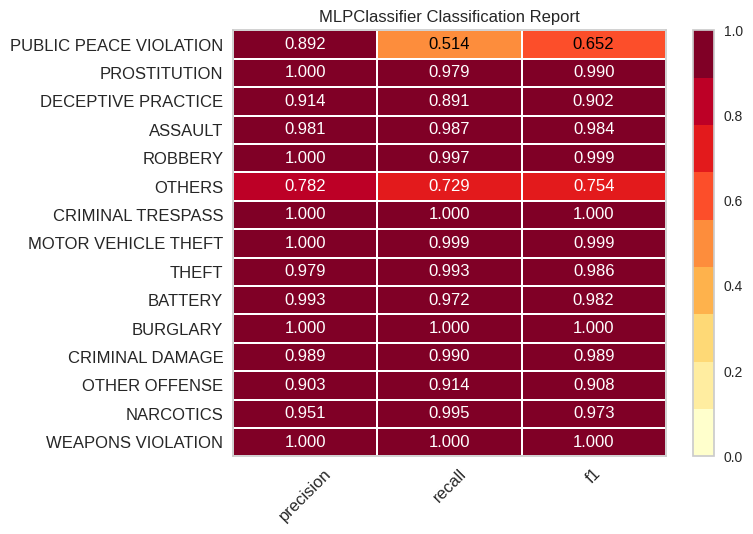

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

**Method 3: K - Nearest Neighbors**

In [ ]:
# Create Model with configuration
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.99955
Recall      :  0.99955
Precision   :  0.9995521247670389
F1 Score    :  0.99955
Confusion Matrix: 
[[ 192    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 2359    0    1    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    1 1225    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 2498    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1206    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0 3600    0    0    0    2    0    0    0    0
     0]
 [   0    0    0    0    0    0 3910    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0  878    0    1    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  622    0    0    0    0    0
     0]
 [   0    0    0    0    0    1    0    0    0  467    0    0    0    0
     0]
 [   0    0    0    0    0  

================= Classification Report =================

                        precision    recall  f1-score   support

     WEAPONS VIOLATION       1.00      1.00      1.00       192
             NARCOTICS       1.00      1.00      1.00      2360
         OTHER OFFENSE       1.00      1.00      1.00      1226
       CRIMINAL DAMAGE       1.00      1.00      1.00      2498
              BURGLARY       1.00      1.00      1.00      1206
               BATTERY       1.00      1.00      1.00      3602
                 THEFT       1.00      1.00      1.00      3910
   MOTOR VEHICLE THEFT       1.00      1.00      1.00       879
     CRIMINAL TRESPASS       1.00      1.00      1.00       622
                OTHERS       0.99      1.00      0.99       468
               ROBBERY       1.00      1.00      1.00       769
               ASSAULT       1.00      1.00      1.00      1227
    DECEPTIVE PRACTICE       1.00      1.00      1.00       605
          PROSTITUTION       1.00      1.00 

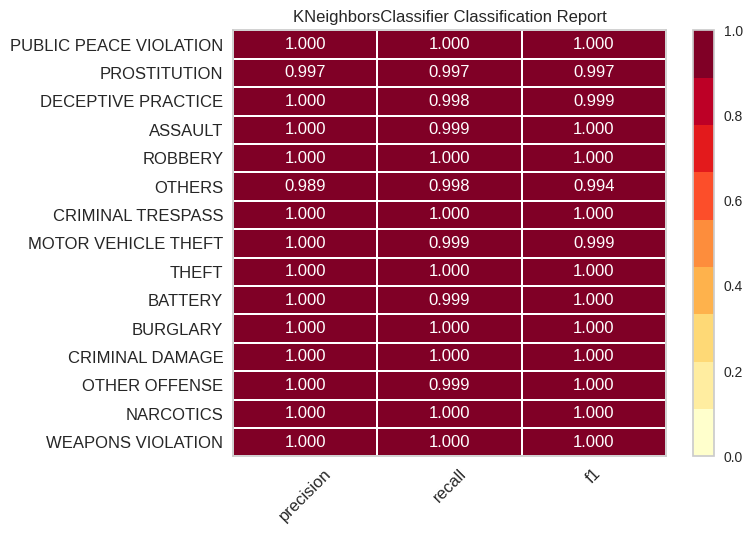

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

Ensemble Voting Model- an amalgamation of the above given models

In [ ]:
# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)],
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)

# Prediction
result = eclf1.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Ensemble Voting Results =============
Accuracy    :  0.9979
Recall      :  0.9979
Precision   :  0.9979205561825436
F1 Score    :  0.9979
Confusion Matrix: 
[[ 192    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 2360    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0 1226    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 2498    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1206    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0 3602    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    3 3907    0    0    0    0    0    0    0
     0]
 [   0    0    0    1    0    0    0  878    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  622    0    0    0    0    0
     0]
 [   0    4    7    0    0    4    0    0    0  453    0    0    0    0
     0]
 [   0    0    0    0    0   

================= Classification Report =================

                        precision    recall  f1-score   support

     WEAPONS VIOLATION       1.00      1.00      1.00       192
             NARCOTICS       1.00      1.00      1.00      2360
         OTHER OFFENSE       0.99      1.00      0.99      1226
       CRIMINAL DAMAGE       1.00      1.00      1.00      2498
              BURGLARY       1.00      1.00      1.00      1206
               BATTERY       1.00      1.00      1.00      3602
                 THEFT       1.00      1.00      1.00      3910
   MOTOR VEHICLE THEFT       1.00      1.00      1.00       879
     CRIMINAL TRESPASS       1.00      1.00      1.00       622
                OTHERS       0.98      0.97      0.97       468
               ROBBERY       1.00      1.00      1.00       769
               ASSAULT       1.00      1.00      1.00      1227
    DECEPTIVE PRACTICE       1.00      0.98      0.99       605
          PROSTITUTION       1.00      0.98 

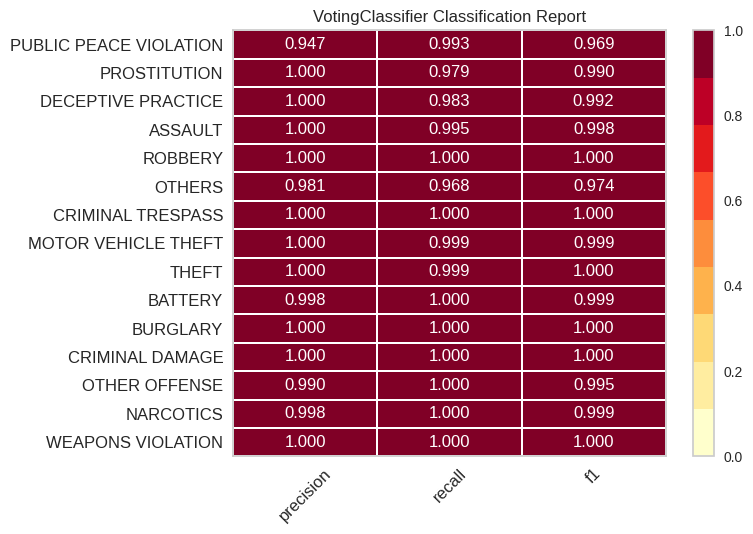

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

# **Time Series Analysis USing FB Prophet**

In [ ]:
#Drop the columns that we are not going to use from the dataset
chicago_data = data.drop(['Unnamed: 0','ID','Case Number','IUCR','X Coordinate', 'Y Coordinate', 'Latitude',
       'Longitude','Location','FBI Code','Ward','Year','Community Area','District','Beat'],axis=1)

In [ ]:
chicago_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Updated On
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,04/15/2016 08:55:02 AM
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,04/15/2016 08:55:02 AM
6,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,08/29/2006 03:46:28 AM
7,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,04/15/2016 08:55:02 AM
9,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,04/15/2016 08:55:02 AM


In [ ]:
chicago_data['Date'] = pd.to_datetime(chicago_data.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_data.set_index('Date',inplace=True)

In [ ]:
chicago_data.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Updated On
Date,,,,,,,
2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,04/15/2016 08:55:02 AM
2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,04/15/2016 08:55:02 AM
2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,08/29/2006 03:46:28 AM
2003-03-15 00:00:00,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,04/15/2016 08:55:02 AM
2003-01-01 00:00:00,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,04/15/2016 08:55:02 AM


In [ ]:
temp = chicago_data.resample('Y').size()
temp

Date
2001-12-31      1409
2002-12-31       391
2003-12-31       116
2004-12-31         3
2005-12-31       700
2006-12-31    339671
2007-12-31     50309
2008-12-31    371204
2009-12-31       413
2010-12-31       177
2011-12-31       198
Freq: A-DEC, dtype: int64

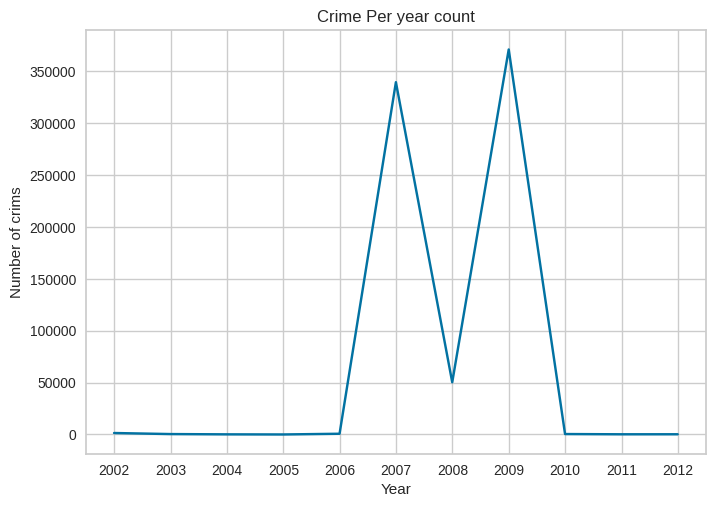

In [ ]:
pl.plot(temp)
pl.title('Crime Per year count')
pl.xlabel('Year')
pl.ylabel('Number of crimes')
pl.show()

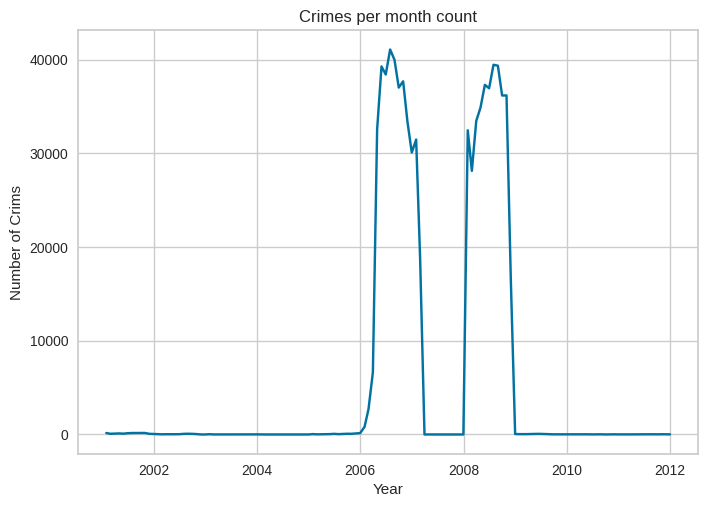

In [ ]:
pl.plot(chicago_data.resample('M').size())
pl.title('Crimes per month count')
pl.xlabel('Months')
pl.ylabel('Number of Crimes')
pl.show()

In [ ]:
chicago_prohet = chicago_data.resample('M').size().reset_index()
chicago_prohet

,Date,0
0,2001-01-31,156
1,2001-02-28,73
2,2001-03-31,89
3,2001-04-30,111
4,2001-05-31,86
...,...,...
127,2011-08-31,21
128,2011-09-30,14
129,2011-10-31,23
130,2011-11-30,17


In [ ]:
chicago_prohet.columns = ['Date','CrimeCount']
chicago_prohet

,Date,CrimeCount
0,2001-01-31,156
1,2001-02-28,73
2,2001-03-31,89
3,2001-04-30,111
4,2001-05-31,86
...,...,...
127,2011-08-31,21
128,2011-09-30,14
129,2011-10-31,23
130,2011-11-30,17


In [ ]:
chicago_prohet_data = chicago_prohet.rename(columns={'Date':'ds','CrimeCount':'y'})
chicago_prohet_data

,ds,y
0,2001-01-31,156
1,2001-02-28,73
2,2001-03-31,89
3,2001-04-30,111
4,2001-05-31,86
...,...,...
127,2011-08-31,21
128,2011-09-30,14
129,2011-10-31,23
130,2011-11-30,17


In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(chicago_prohet_data)#Training model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimq_9pii/38ritcbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimq_9pii/n1cywo9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14189', 'data', 'file=/tmp/tmpimq_9pii/38ritcbl.json', 'init=/tmp/tmpimq_9pii/n1cywo9k.json', 'output', 'file=/tmp/tmpimq_9pii/prophet_modelqavlmpo6/prophet_model-20231005193902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)#using trained model to make predictions
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,4301.992,-10784.983,21551.184,4301.992,4301.992,149.203,149.203,149.203,149.203,149.203,149.203,0.000,0.000,0.000,4451.195
1,2001-02-28,4323.391,-13867.970,19344.982,4323.391,4323.391,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,0.000,0.000,0.000,3196.471
2,2001-03-31,4347.083,-12587.438,18250.183,4347.083,4347.083,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,0.000,0.000,0.000,2292.988
3,2001-04-30,4370.011,-9607.947,21145.177,4370.011,4370.011,354.141,354.141,354.141,354.141,354.141,354.141,0.000,0.000,0.000,4724.152
4,2001-05-31,4393.703,-10030.465,21547.235,4393.703,4393.703,1173.530,1173.530,1173.530,1173.530,1173.530,1173.530,0.000,0.000,0.000,5567.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2012-12-26,7651.973,-10340.550,21163.751,7651.839,7652.112,-2564.145,-2564.145,-2564.145,-2564.145,-2564.145,-2564.145,0.000,0.000,0.000,5087.828
493,2012-12-27,7652.744,-10399.384,20336.587,7652.609,7652.883,-2735.499,-2735.499,-2735.499,-2735.499,-2735.499,-2735.499,0.000,0.000,0.000,4917.245
494,2012-12-28,7653.515,-12799.537,21201.102,7653.379,7653.655,-2892.542,-2892.542,-2892.542,-2892.542,-2892.542,-2892.542,0.000,0.000,0.000,4760.972
495,2012-12-29,7654.285,-11127.794,20480.843,7654.150,7654.427,-3031.275,-3031.275,-3031.275,-3031.275,-3031.275,-3031.275,0.000,0.000,0.000,4623.010


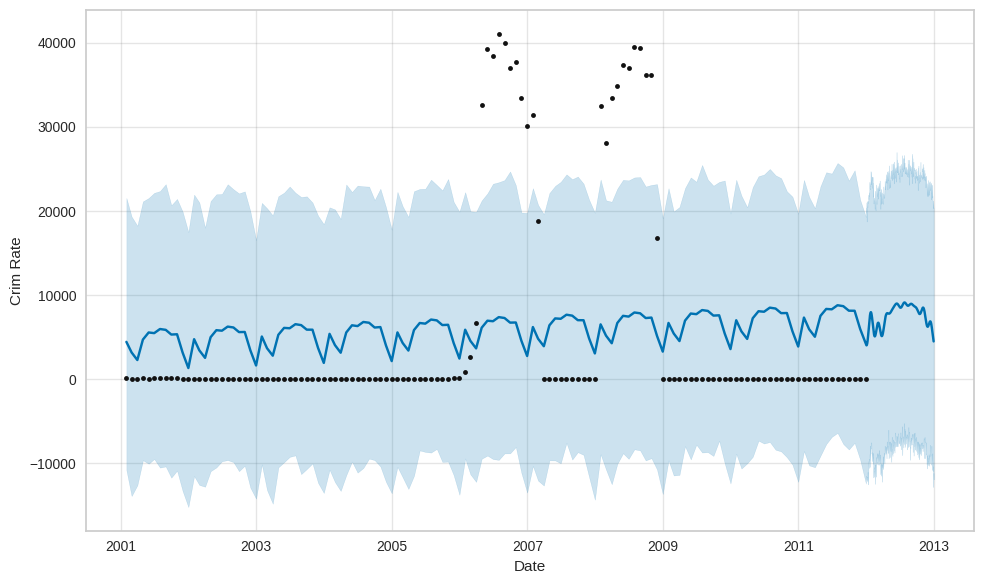

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

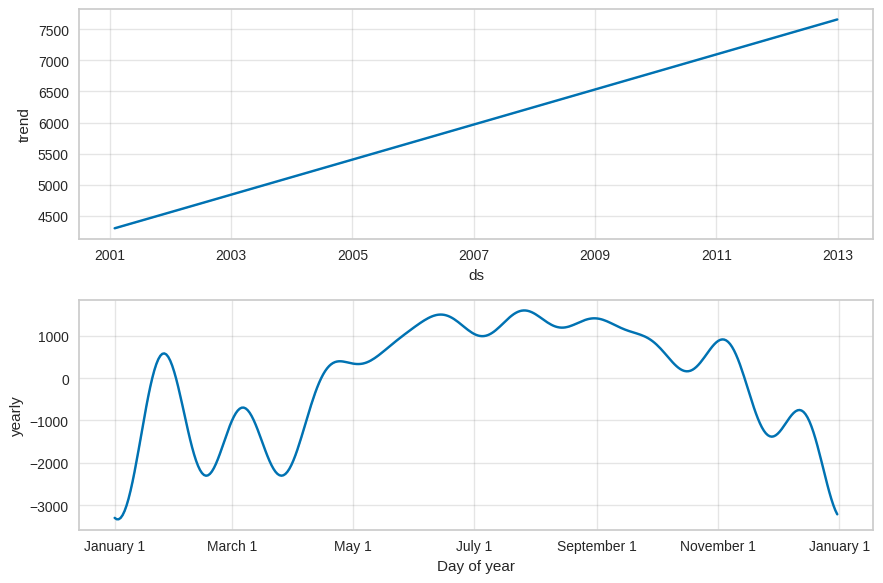

In [ ]:
figure = m.plot_components(forcast)

In [ ]:
future = m.make_future_dataframe(periods=720)
forcast = m.predict(future)#USing trained and tested model to make future predictions
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,4301.992,-11417.856,20160.524,4301.992,4301.992,149.203,149.203,149.203,149.203,149.203,149.203,0.000,0.000,0.000,4451.195
1,2001-02-28,4323.391,-12371.261,19448.649,4323.391,4323.391,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,0.000,0.000,0.000,3196.471
2,2001-03-31,4347.083,-13385.227,17107.590,4347.083,4347.083,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,0.000,0.000,0.000,2292.988
3,2001-04-30,4370.011,-10912.947,21789.656,4370.011,4370.011,354.141,354.141,354.141,354.141,354.141,354.141,0.000,0.000,0.000,4724.152
4,2001-05-31,4393.703,-9803.493,21586.350,4393.703,4393.703,1173.530,1173.530,1173.530,1173.530,1173.530,1173.530,0.000,0.000,0.000,5567.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2013-12-16,7925.575,-10083.610,24155.896,7925.206,7925.966,-927.450,-927.450,-927.450,-927.450,-927.450,-927.450,0.000,0.000,0.000,6998.125
848,2013-12-17,7926.346,-9370.251,24076.796,7925.976,7926.737,-1024.323,-1024.323,-1024.323,-1024.323,-1024.323,-1024.323,0.000,0.000,0.000,6902.023
849,2013-12-18,7927.116,-11191.027,22913.091,7926.746,7927.509,-1141.504,-1141.504,-1141.504,-1141.504,-1141.504,-1141.504,0.000,0.000,0.000,6785.612
850,2013-12-19,7927.887,-9264.999,22141.788,7927.516,7928.280,-1277.466,-1277.466,-1277.466,-1277.466,-1277.466,-1277.466,0.000,0.000,0.000,6650.421


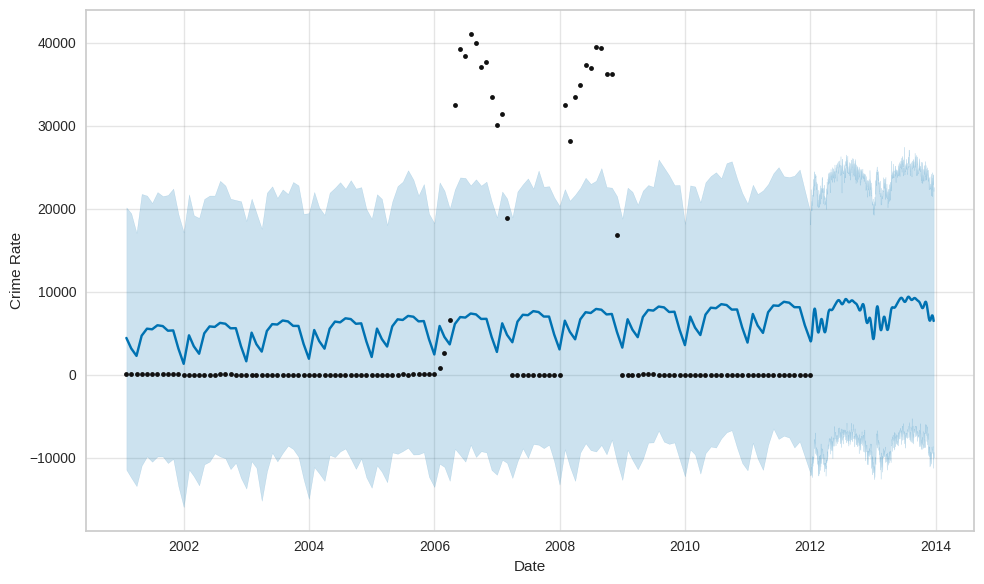

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crime Rate')

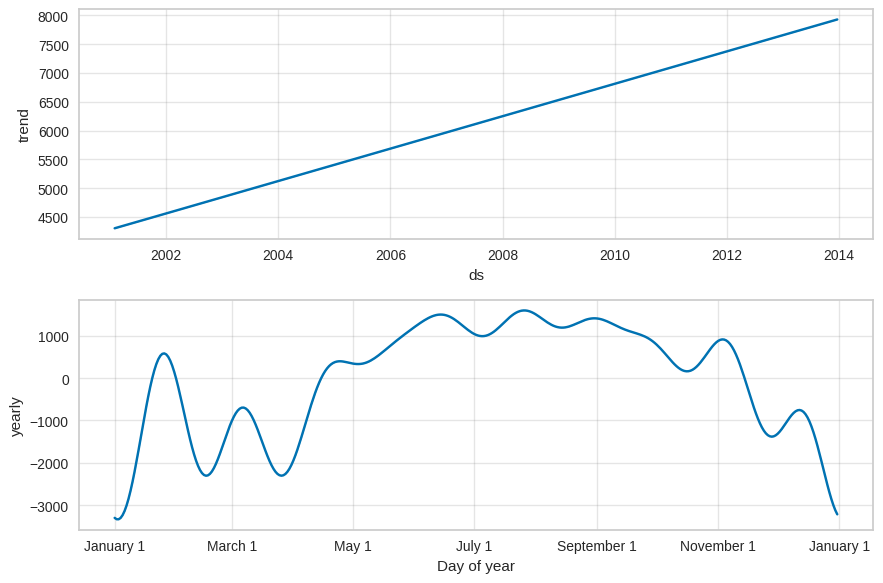

In [ ]:
figure = m.plot_components(forcast)

# Testing for **demo**

Here no pre processing techniques are used. Unwanted columns and features are dropped and a data that the model is completely unfamiliar off, is introduced

In [ ]:
df4 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)

In [ ]:
df4 = df4.dropna()
df4 = df4.drop_duplicates()

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669309 entries, 0 to 677126
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            669309 non-null  int64  
 1   ID                    669309 non-null  int64  
 2   Case Number           669309 non-null  object 
 3   Date                  669309 non-null  object 
 4   Block                 669309 non-null  object 
 5   IUCR                  669309 non-null  object 
 6   Primary Type          669309 non-null  object 
 7   Description           669309 non-null  object 
 8   Location Description  669309 non-null  object 
 9   Arrest                669309 non-null  bool   
 10  Domestic              669309 non-null  bool   
 11  Beat                  669309 non-null  int64  
 12  District              669309 non-null  float64
 13  Ward                  669309 non-null  float64
 14  Community Area        669309 non-null  float64
 15  

In [ ]:
df4 = df4.sample(n=10)

In [ ]:
df4.drop(['Unnamed: 0','Date','ID','Case Number','X Coordinate', 'Y Coordinate', 'Latitude',
       'Longitude','Location','Ward','Year','Community Area','District','Beat','Block','Arrest','Domestic','Location Description','Updated On'],axis=1,inplace=True)

In [ ]:
df4.head()

,IUCR,Primary Type,Description,FBI Code
434686,25,6,24,6
89046,5,4,5,4
206262,35,4,14,13
9359,1,1,1,1
674456,4,3,4,3


In [ ]:
df4['IUCR'] = pd.factorize(df4["IUCR"])[0]
df4['FBI Code'] = pd.factorize(df4["FBI Code"])[0]
df4['Description'] = pd.factorize(df4["Description"])[0]

In [ ]:
test_feat=df4.drop(['Primary Type'],axis=1)
test_tar=df4['Primary Type']

In [ ]:
df4['Primary Type'] = pd.factorize(df4["Primary Type"])[0]

In [ ]:
test_res=rf_model.predict(test_feat)

In [ ]:
ac_sc = accuracy_score(test_tar, test_res)
rc_sc = recall_score(test_tar, test_res, average="weighted")
pr_sc = precision_score(test_tar, test_res, average="weighted")
f1_sc = f1_score(test_tar, test_res, average='micro')
confusion_m = confusion_matrix(test_tar, test_res)

print("============= Random Forest Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Random Forest Voting Results =============
Accuracy    :  0.6
Recall      :  0.6
Precision   :  0.575
F1 Score    :  0.6
Confusion Matrix: 
[[2 0 0 0 0 0]
 [0 2 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 2 0 0]]
